In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset 
import torchvision
import pandas as pd

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device: ' + str(device))

size_input = 784
size_hidden = 100
n_classes = 10

n_epochs = 2
batch_size = 100
n_iter = n_epochs // batch_size
learn_r = 0.001

path = ''
train_data = torchvision.datasets.MNIST(root=path, train=True, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root=path, train=False, transform=torchvision.transforms.ToTensor())

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10000, shuffle=False)

device: cpu


In [6]:
len(test_data)

10000

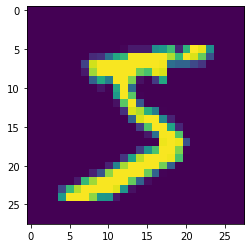

In [215]:
plt.imshow(train_data[0][0][0])

In [74]:
c = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=4, stride=2)

In [75]:
x = torch.reshape(train_data[0][0], (1,1,28,28))

In [76]:
with torch.no_grad():
    x2= c(x)

In [77]:
x2.shape

torch.Size([1, 3, 13, 13])

In [78]:
p = nn.MaxPool2d(kernel_size=2, stride=2)

In [79]:
with torch.no_grad():
    x3 = p(x2)

In [82]:
x3.shape

torch.Size([1, 3, 6, 6])

In [93]:
a = torch.flatten(x3, start_dim=1)
a.shape

torch.Size([1, 108])

In [91]:
3*6*6

108

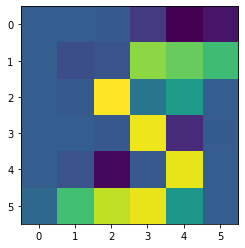

In [80]:
with torch.no_grad():
    plt.imshow(x3[0][0])

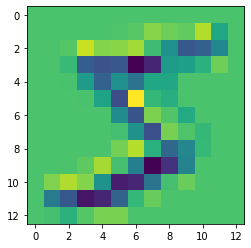

In [45]:
with torch.no_grad():
    plt.imshow(x2[0][0])

In [5]:
input_img_len = 28
k_len = 4
s_len = 2
output_img_len = 1 + (input_img_len - k_len) / s_len
print('output_img_len: ' + str(output_img_len))

output_len = 1 + (output_img_len - 3) / 2
print(output_len)

output_len = 1 + (output_len - 2) / 2
print(output_len)


class NeuralNet(nn.Module):
    
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=2)
        self.im_size = int((28 - 3 - 2) / 2 + 2)
        self.lin_inp_size = int(6 * self.im_size**2)
        #self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.lin_1 = nn.Linear(self.lin_inp_size, 100)
        self.lin_2 = nn.Linear(100, n_classes)
        
    def forward(self, inp):
        out_1 = self.conv(inp)
        #out_2 = self.pool(out_1)
        out_3 = torch.relu(self.lin_1(torch.flatten(out_1, start_dim=1)))
        out_4 = self.lin_2(out_3)
        return out_4

model = NeuralNet().to(device)

output_img_len: 13.0
6.0
3.0


In [11]:
print(model.im_size)
print(model.lin_inp_size)

13
1014


In [12]:
12*12*3

432

In [6]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learn_r)

for epoch in range(1):
    for i, batch in enumerate(train_loader):
        images, labels = batch
        y_pred = model(images).to(device)
        loss = criterion(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i%100==0:
            print(epoch, loss)
        
        

0 tensor(2.2921, grad_fn=<NllLossBackward>)
0 tensor(0.6657, grad_fn=<NllLossBackward>)
0 tensor(0.3095, grad_fn=<NllLossBackward>)
0 tensor(0.2379, grad_fn=<NllLossBackward>)
0 tensor(0.3124, grad_fn=<NllLossBackward>)
0 tensor(0.2082, grad_fn=<NllLossBackward>)


In [214]:
with torch.no_grad():
    for test_batch in test_loader:
        images, labels = test_batch
        y_pred = model(images).to(device)
        max_inidices = torch.max(y_pred, dim=1)[1]
        n_correct = (labels == max_inidices).sum()

        print(n_correct.item()/10000)

0.9617


In [151]:
test_iter = iter(test_loader)
test_images, test_labels = test_iter.next()

prediction: 8


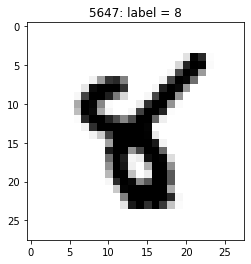

In [194]:
def test():
    i = np.random.randint(10000)
    image = test_data[0][i]
    label = test_data[1][i]
    plt.imshow(image[0], cmap='Greys')
    plt.title(str(i) + ': label = ' + str(label.item()))
    with torch.no_grad():
        img = torch.reshape(image, (1,1,28,28))
        y_pred = model(img)
        max_index = torch.argmax(y_pred).item()
        print('prediction:', max_index)
test()

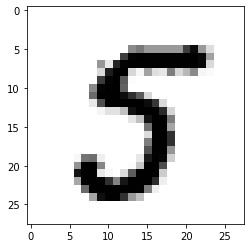

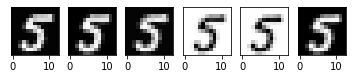

In [263]:
i = np.random.randint(60000)
x = torch.reshape(train_data[i][0], (1,1,28,28))
plt.figure(0)
plt.imshow(x[0][0], 'Greys')
with torch.no_grad():
    for i in range(6):
        x2= model.conv(x)
        plt.figure(2)
        plt.subplot(1,6,i+1)
        plt.imshow(x2[0][i], 'Greys')
        plt.yticks([])

In [127]:
# out0 = 28
# k1 = 5
# k2 = 5
# s_len = 1

# k_pool = 2
# s_pool = 2

# out1 = 1 + (out0 - k1 + 4) / s_len
# print('out1: ' + str(out1))

# in2 = out1/2
# print(in2)

# out2 = 1 + (in2 - k2) / s_len
# print('out2: ' + str(out2))


class ConvNeuralNet(nn.Module):
    
    def __init__(self):
        super(ConvNeuralNet, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.pool2 =nn.MaxPool2d(kernel_size=2)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5)
        
        self.lin_1 = nn.Linear(120, 84)
        self.lin_2 = nn.Linear(84, 10)
        
        self.drop_input = nn.Dropout2d(p=0.2)
        self.drop_conv1 = nn.Dropout2d(p=0.1)
        self.drop_conv3 = nn.Dropout(p=0.2)
        self.drop_lin1 = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = self.drop_input(x)

        x = torch.relu(self.conv1(x))
        x = self.drop_conv1(x)
        x = self.pool1(x)
        
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        
        x = torch.relu(self.conv3(x))
        
        x = x.view(-1, 120)
        x = self.drop_conv3(x)
        
        x = torch.relu(self.lin_1(x))
        x = self.drop_lin1(x)
        x = self.lin_2(x)
        
        return x
    
model_conv = ConvNeuralNet()

In [128]:
criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model_conv.parameters(), lr=0.001)


for epoch in range(10):
    for i, batch in enumerate(train_loader):
        images, labels = batch
        y_pred = model_conv(images).to(device)
        loss = criterion(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i%100==0:
            print(epoch, i, loss)

0 0 tensor(2.3076, grad_fn=<NllLossBackward>)
0 100 tensor(0.9507, grad_fn=<NllLossBackward>)
0 200 tensor(0.6103, grad_fn=<NllLossBackward>)
0 300 tensor(0.6644, grad_fn=<NllLossBackward>)
0 400 tensor(0.5679, grad_fn=<NllLossBackward>)
0 500 tensor(0.6057, grad_fn=<NllLossBackward>)
1 0 tensor(0.5602, grad_fn=<NllLossBackward>)
1 100 tensor(0.6201, grad_fn=<NllLossBackward>)
1 200 tensor(0.4418, grad_fn=<NllLossBackward>)
1 300 tensor(0.4599, grad_fn=<NllLossBackward>)
1 400 tensor(0.6634, grad_fn=<NllLossBackward>)
1 500 tensor(0.4325, grad_fn=<NllLossBackward>)
2 0 tensor(0.4486, grad_fn=<NllLossBackward>)
2 100 tensor(0.7376, grad_fn=<NllLossBackward>)
2 200 tensor(0.5620, grad_fn=<NllLossBackward>)
2 300 tensor(0.4409, grad_fn=<NllLossBackward>)
2 400 tensor(0.4739, grad_fn=<NllLossBackward>)
2 500 tensor(0.7274, grad_fn=<NllLossBackward>)
3 0 tensor(0.3851, grad_fn=<NllLossBackward>)
3 100 tensor(0.4356, grad_fn=<NllLossBackward>)
3 200 tensor(0.6658, grad_fn=<NllLossBackward>)


In [129]:
optimizer = torch.optim.Adam(model_conv.parameters(), lr=0.00005)


for epoch in range(10):
    for i, batch in enumerate(train_loader):
        images, labels = batch
        y_pred = model_conv(images).to(device)
        loss = criterion(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i%100==0:
            print(epoch, i, loss)

0 0 tensor(0.5290, grad_fn=<NllLossBackward>)
0 100 tensor(0.2739, grad_fn=<NllLossBackward>)
0 200 tensor(0.4616, grad_fn=<NllLossBackward>)
0 300 tensor(0.4184, grad_fn=<NllLossBackward>)
0 400 tensor(0.5137, grad_fn=<NllLossBackward>)
0 500 tensor(0.3764, grad_fn=<NllLossBackward>)
1 0 tensor(0.6735, grad_fn=<NllLossBackward>)
1 100 tensor(0.5463, grad_fn=<NllLossBackward>)
1 200 tensor(0.4193, grad_fn=<NllLossBackward>)
1 300 tensor(0.4474, grad_fn=<NllLossBackward>)
1 400 tensor(0.5785, grad_fn=<NllLossBackward>)
1 500 tensor(0.4394, grad_fn=<NllLossBackward>)
2 0 tensor(0.4707, grad_fn=<NllLossBackward>)
2 100 tensor(0.4589, grad_fn=<NllLossBackward>)
2 200 tensor(0.4204, grad_fn=<NllLossBackward>)
2 300 tensor(0.5346, grad_fn=<NllLossBackward>)
2 400 tensor(0.3824, grad_fn=<NllLossBackward>)
2 500 tensor(0.5272, grad_fn=<NllLossBackward>)
3 0 tensor(0.5191, grad_fn=<NllLossBackward>)
3 100 tensor(0.3073, grad_fn=<NllLossBackward>)
3 200 tensor(0.4317, grad_fn=<NllLossBackward>)


In [131]:
model_conv.eval()
with torch.no_grad():
    for test_batch in test_loader:
        images, labels = test_batch
        y_pred = model_conv(images).to(device)
        max_inidices = torch.max(y_pred, dim=1)[1]
        n_correct = (labels == max_inidices).sum()

        print(n_correct.item()/100)

99.02


prediction: 9


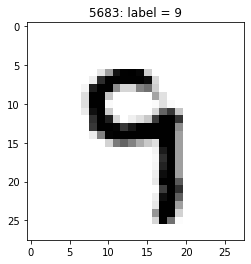

In [109]:
def test():
    i = np.random.randint(10000)
    image = test_data[i][0]
    label = test_data[i][1]
    plt.imshow(image[0], cmap='Greys')
    plt.title(str(i) + ': label = ' + str(label))
    with torch.no_grad():
        img = torch.reshape(image, (1,1,28,28))
        y_pred = model(img)
        max_index = torch.argmax(y_pred).item()
        print('prediction:', max_index)
test()

i=1827
torch.Size([1, 6, 28, 28])
torch.Size([1, 6, 14, 14])
torch.Size([1, 32, 1, 1])
torch.Size([1, 16, 5, 5])
torch.Size([1, 32, 1, 1])


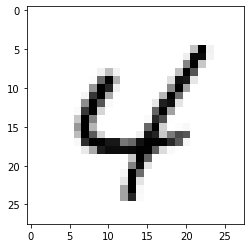

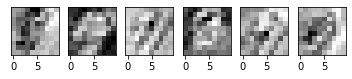

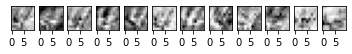

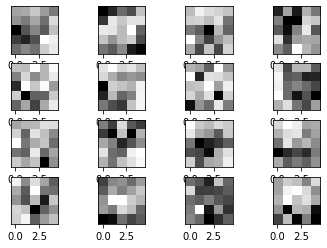

In [166]:
i = np.random.randint(60000)
print('i=' +str(i))
x = torch.reshape(train_data[i][0], (1,1,28,28))
plt.figure(0)
plt.imshow(x[0][0], 'Greys')
with torch.no_grad():
    
    plt.figure(1)
    x1 = model_conv.conv1(x)
    print(x1.shape)
    for i in range(6):
        plt.subplot(1,6,i+1)
        plt.imshow(x2[0][i], 'Greys')
        plt.yticks([])
        
    plt.figure(2)
    x1_ = model_conv.pool1(x1)
    print(x1_.shape)
    x2 = model_conv.conv2(x1_)
    print(x3.shape)
    for i in range(12):
        plt.subplot(1,12,i+1)
        plt.imshow(x2[0][i], 'Greys')
        plt.yticks([])
        
    plt.figure(3)
    x2_ = model_conv.pool2(x2)
    print(x2_.shape)
    x3 = model_conv.conv3(x2_)
    print(x3.shape)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x2_[0][i], 'Greys')
        plt.yticks([])

In [25]:
class LeNet5(torch.nn.Module):
     
    def __init__(self):   
        super(LeNet5, self).__init__()
        # Convolution (In LeNet-5, 32x32 images are given as input. Hence padding of 2 is done below)
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        # Max-pooling
        self.max_pool_1 = torch.nn.MaxPool2d(kernel_size=2)
        # Convolution
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        # Max-pooling
        self.max_pool_2 = torch.nn.MaxPool2d(kernel_size=2)
        # Fully connected layer
        self.fc1 = torch.nn.Linear(16*5*5, 120)   # convert matrix with 16*5*5 (= 400) features to a matrix of 120 features (columns)
        self.fc2 = torch.nn.Linear(120, 84)       # convert matrix with 120 features to a matrix of 84 features (columns)
        self.fc3 = torch.nn.Linear(84, 10)        # convert matrix with 84 features to a matrix of 10 features (columns)
        
    def forward(self, x):
        # convolve, then perform ReLU non-linearity
        x = torch.relu(self.conv1(x))  
        # max-pooling with 2x2 grid
        x = self.max_pool_1(x)
        # convolve, then perform ReLU non-linearity
        x = torch.relu(self.conv2(x))
        # max-pooling with 2x2 grid
        x = self.max_pool_2(x)
        # first flatten 'max_pool_2_out' to contain 16*5*5 columns
        # read through https://stackoverflow.com/a/42482819/7551231
        x = x.view(-1, 16*5*5)
        # FC-1, then perform ReLU non-linearity
        x = torch.relu(self.fc1(x))
        # FC-2, then perform ReLU non-linearity
        x = torch.relu(self.fc2(x))
        # FC-3
        x = self.fc3(x)
        
        return x
     
net = LeNet5()

In [26]:
# set up loss function -- 'SVM Loss' a.k.a ''Cross-Entropy Loss
criterion = torch.nn.CrossEntropyLoss()  
   
# SGD used for optimization, momentum update used as parameter update   
optimizer = torch.optim.Adam(net.parameters(), lr = 0.001) 


In [27]:
for epoch in range(3):
    for i, batch in enumerate(train_loader):
        images, labels = batch
        y_pred = net(images).to(device)
        loss = criterion(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i%100==0:
            print(epoch, i, loss)

0 0 tensor(2.2948, grad_fn=<NllLossBackward>)
0 100 tensor(0.3310, grad_fn=<NllLossBackward>)
0 200 tensor(0.1349, grad_fn=<NllLossBackward>)
0 300 tensor(0.2050, grad_fn=<NllLossBackward>)
0 400 tensor(0.1086, grad_fn=<NllLossBackward>)
0 500 tensor(0.0204, grad_fn=<NllLossBackward>)
1 0 tensor(0.1760, grad_fn=<NllLossBackward>)
1 100 tensor(0.0664, grad_fn=<NllLossBackward>)
1 200 tensor(0.0911, grad_fn=<NllLossBackward>)
1 300 tensor(0.1392, grad_fn=<NllLossBackward>)
1 400 tensor(0.0474, grad_fn=<NllLossBackward>)
1 500 tensor(0.0238, grad_fn=<NllLossBackward>)
2 0 tensor(0.1162, grad_fn=<NllLossBackward>)
2 100 tensor(0.0283, grad_fn=<NllLossBackward>)
2 200 tensor(0.0654, grad_fn=<NllLossBackward>)
2 300 tensor(0.0347, grad_fn=<NllLossBackward>)
2 400 tensor(0.0523, grad_fn=<NllLossBackward>)
2 500 tensor(0.0334, grad_fn=<NllLossBackward>)


In [213]:
model_conv.eval()
with torch.no_grad():
    for test_data in test_loader:
        images, labels = test_data
        y_pred = net(images).to(device)
        max_inidices = torch.max(y_pred, dim=1)[1]
        n_correct = (labels == max_inidices).sum()

        print(n_correct.item()/10000)

0.9808


In [220]:
exit()


import time = 0.0001430511474609375
image time = 0.01713109016418457
time 2 = 3.5987980365753174
middle time = 3.599459171295166


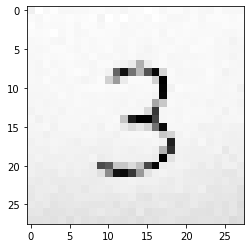

In [113]:
import time
t0 = time.time()

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as img

print('import time =', time.time()-t0)

my_image = img.imread('database/image de trois.jpg', format='jpg')
height, length, color = my_image.shape

my_image = np.array(my_image)

j_start = int(length/2 - height/2)

print('image time =', time.time() - t0)

n = 28

def new_image(my_image):
    # Convert 720 * 1080 rvb image into 28 * 28 black&white
    

    grey_image = np.zeros((height, height), dtype='int32')
    
    for i in range(height):
        for j in range(height):
            sum = 0
            for k in range(3):
                sum += my_image[i][j+j_start][k]
            grey_image[i][j] = 255 - sum//3
            # grey_image[i][j] = 255 - np.mean(pixel)
            
    print('time 2 =', time.time() - t0)
    
    my_new_image = np.zeros((n, n))
    kl_lim = height // (n - 1) - 1
    k_tot = 0
    count = 0
    
    print('middle time =', time.time() - t0)
    
    for i in range(n):
        l_tot = 0
        for j in range(n):
            count += 1
            sum = 0
            k = 0
            l = 0
            
            while k <= kl_lim and k_tot <= height-1:
                while l <= kl_lim and l_tot <= height-1:
                    sum += grey_image[k_tot][l_tot]
                    l += 1
                k += 1
                
            new_pixel = sum / (k + l)
            my_new_image[i][j] = new_pixel
            l_tot += kl_lim
        k_tot += kl_lim
        
    return my_new_image

im28 = new_image(my_image)

plt.imshow(im28, cmap='Greys')




In [114]:
img = torch.tensor(im28, dtype= torch.float32)
img = img.view(1,1,28,28)/img.max()
img.shape

torch.Size([1, 1, 28, 28])

In [115]:
torch.argmax(model_conv(img))

tensor(8)

In [4]:
import CNN

In [2]:
CNN.main()

epoch: 1/2 batch: 0/600 loss = 2.3057913780212402
epoch: 1/2 batch: 100/600 loss = 0.9239262938499451
epoch: 1/2 batch: 200/600 loss = 0.7629928588867188
epoch: 1/2 batch: 300/600 loss = 0.5907454490661621
epoch: 1/2 batch: 400/600 loss = 0.48600780963897705
epoch: 1/2 batch: 500/600 loss = 0.7260846495628357
epoch: 2/2 batch: 0/600 loss = 0.4838714897632599
epoch: 2/2 batch: 100/600 loss = 0.5479997992515564
epoch: 2/2 batch: 200/600 loss = 0.6552199721336365
epoch: 2/2 batch: 300/600 loss = 0.5561258792877197
epoch: 2/2 batch: 400/600 loss = 0.6343634128570557
epoch: 2/2 batch: 500/600 loss = 0.5805419683456421
# done


0.981

In [5]:
CNN.model_conv

ConvNeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (lin_1): Linear(in_features=120, out_features=84, bias=True)
  (lin_2): Linear(in_features=84, out_features=10, bias=True)
  (drop_input): Dropout2d(p=0.2, inplace=False)
  (drop_conv1): Dropout2d(p=0.1, inplace=False)
  (drop_conv3): Dropout(p=0.2, inplace=False)
  (drop_lin1): Dropout(p=0.2, inplace=False)
)